In [1]:
import copy
import math

import numpy as np
import urllib
import cv2
import matplotlib.pyplot as plt

from torchvision import utils
from matplotlib import gridspec
plt.rcParams["figure.figsize"] = (10,10)

from hmax_models.hmax import *

%matplotlib inline

In [2]:
import numpy as np
import urllib
import matplotlib.pyplot as plt
from torchvision import utils
from matplotlib import gridspec
plt.rcParams["figure.figsize"] = (10,10)
import cv2
    
def visTensor(tensor, ax, ch=0, allkernels=False, nrow=8, padding=1,title='',size=15): 
    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c, -1, w, h)
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
    rows = np.min((tensor.shape[0] // nrow + 1, 64))    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    #plt.figure( figsize=(size,size) )
    ax.imshow(grid.numpy().transpose((1, 2, 0)))
    ax.set_title(title)
    ax.axis('off')
    #ax.ioff()
    
def visualize_s1_cells_lore(model):
    row =-1 
    #fig, axs = plt.subplots(16,)
    fig = plt.figure(figsize=(20,30))
    gs = gridspec.GridSpec(16,1, height_ratios=[a/7. for a in range(7,39,2)])
    for s1_cell in model.s1.s1_cells:
        row+=1
        gabor_filter = s1_cell.weight.data.clone()
        string = 's1_%d'%gabor_filter.shape[-1]
        visTensor(gabor_filter,plt.subplot(gs[row]), ch=0, allkernels=False,nrow=4,title= string,size=gabor_filter.shape[-1])
    plt.axis('off')
    plt.ioff()
    plt.tight_layout()
    plt.savefig('Simple_Cells_visualziation.pdf')
    plt.show()


def visualize_s1_cells(model):
    row =-1 
    #fig, axs = plt.subplots(16,)
    fig = plt.figure(figsize=(20,30))
    gs = gridspec.GridSpec(16,1, height_ratios=[a/7. for a in range(7,39,2)])
    for i in range(7,39,2):
        row+=1
        string = 's_%d'%i
        s_cell = getattr(model.s1,string)
        gabor_filter = s_cell.weight.data.clone()
        visTensor(gabor_filter,plt.subplot(gs[row]), ch=0, allkernels=False,nrow=4,title= string,size=i)
    plt.axis('off')
    plt.ioff()
    plt.tight_layout()
    plt.savefig('Simple_Cells_visualziation.pdf')
    plt.show()
    
def visualize_s1_cells_image_lore(model,image):
    row =-1 
    #fig, axs = plt.subplots(16,)
    fig = plt.figure(figsize=(20,30))
    gs = gridspec.GridSpec(16,1, height_ratios=[a/7. for a in range(7,39,2)])
    for s1_cell in model.s1.s1_cells:
        row+=1
        #s_cell = getattr(model,string)
        gabor_filter = s_cell.weight.data.clone()
        string = 's1_%d'%gabor_filter.shape[-1]
        visTensor(gabor_filter,plt.subplot(gs[row]), ch=0, allkernels=False,nrow=4,title= string,size=gabor_filter.shape[-1])
    plt.axis('off')
    plt.ioff()
    plt.tight_layout()
    plt.savefig('Simple_Cells_visualziation.pdf')
    plt.show()
    
def visualize_s1_cells_image(model,image):
    row =-1 
    #fig, axs = plt.subplots(16,)
    fig = plt.figure(figsize=(20,30))
    gs = gridspec.GridSpec(16,1, height_ratios=[a/7. for a in range(7,39,2)])
    for i in range(7,39,2):
        row+=1
        string = 's_%d'%i
        s_cell = getattr(model,string)
        gabor_filter = s_cell.weight.data.clone()
        visTensor(gabor_filter,plt.subplot(gs[row]), ch=0, allkernels=False,nrow=4,title= string,size=i)
    plt.axis('off')
    plt.ioff()
    plt.tight_layout()
    plt.savefig('Simple_Cells_visualziation.pdf')
    plt.show()
    # Create an image with a gabor patch

def make_gabor_image(ori=0, scale=0, shift_h=0, shift_v=0, show_image = False):
    """
    ori: 0, 1, 2, or 3 indicating which of the 4 orientations used
    scale: index of the scale to use
    shift_h: how many pixels to shift patch horizontally
    shift_v: # how many pixels to shift patch vertically
    show_image: whether or not to show the image
    """
    image = np.zeros((224,224,3))
    string = 's_%d'%scale
    s_cell = getattr(model.s1,string)
    gabor = s_cell.weight[ori, :, :, :].detach().numpy().transpose(1, 2, 0)
    print(gabor.shape)

    offset_h = math.ceil((image.shape[0]-gabor.shape[0])/2)
    offset_w = math.ceil((image.shape[1]-gabor.shape[1])/2)

    image[offset_h + shift_v:offset_h+gabor.shape[0] + shift_v,
          offset_w + shift_h:offset_w+gabor.shape[1] + shift_h, :] = gabor # place gabor in the centre
    image = (image - image.min()) / (image.max() - image.min()) # normalize (min-max)
    
    if show_image:
        plt.imshow(image)
    
    return image

In [3]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

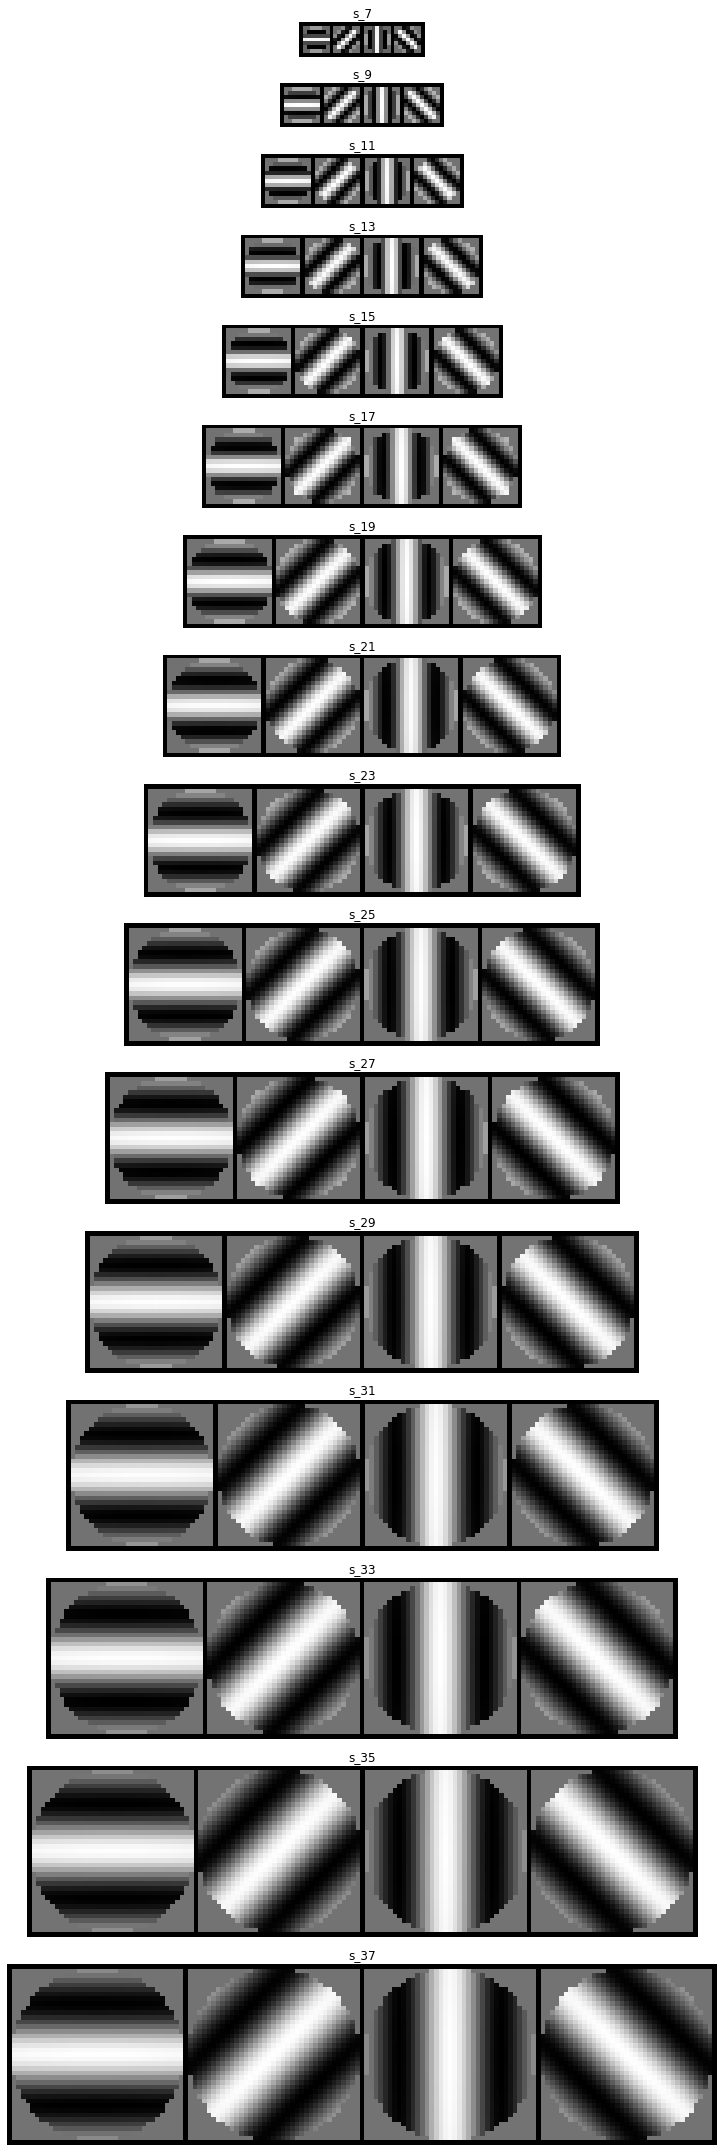

In [4]:
model = HMAX()
model.eval()
visualize_s1_cells(model)

/gpfs/runtime/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  # Remove the CWD from sys.path while we load stuff.


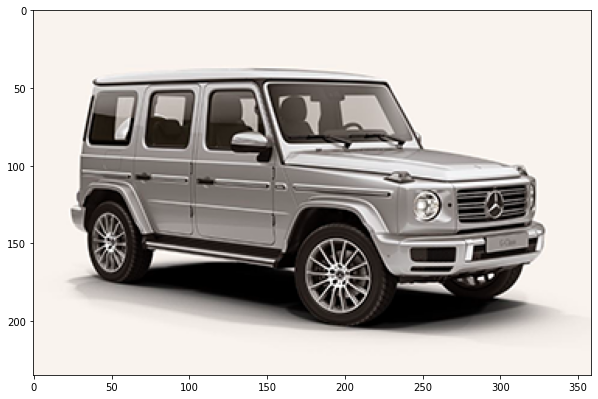

In [5]:
with urllib.request.urlopen("https://cdn.euroncap.com/media/43129/mercedes-benz-g-class-359-235.png?mode=crop&width=359&height=235") as url:
    s = url.read()
    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)
    image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
    

plt.imshow(image)

img = torch.tensor([np.transpose(image,(2,0,1))])
img = img.float()
img = nn.functional.interpolate(img, size=(224,224))

valid True False


AttributeError: 'S1' object has no attribute 's1_cells'

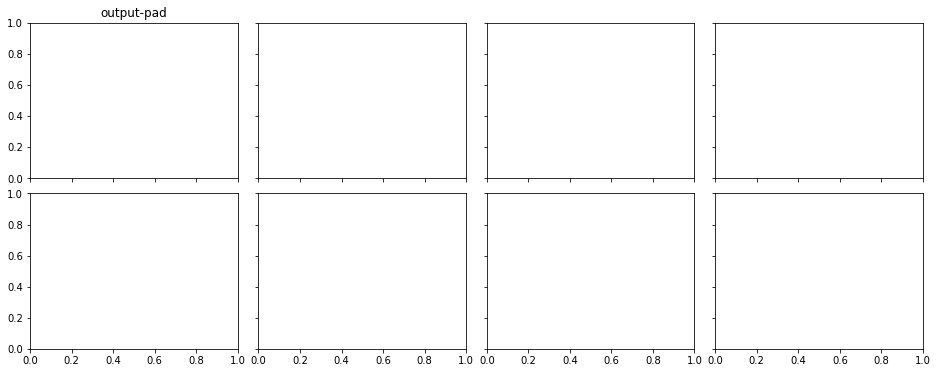

In [6]:
padding_input_flags = ['valid', 'valid', 'valid','same']
padding_output_flags = [True, False, False, False]
resize_output_flags = [False, False, True, False]

gabor_idxs = [0,-1] # indices of scale to visualize

fig, axs = plt.subplots(nrows=len(gabor_idxs), ncols=len(padding_input_flags), gridspec_kw = {'wspace':0.1, 'hspace':0.1}, figsize=(16, 6), sharex=True, sharey=True)

row = 0
col = 0

for padding_input_flag, padding_output_flag, resize_output_flag in zip(padding_input_flags, padding_output_flags, resize_output_flags):
    print(padding_input_flag, padding_output_flag, resize_output_flag)
    if row == 0:
        title = []
        if padding_input_flag == 'same':
            title.append('input-pad')
        if padding_output_flag:
            title.append('output-pad')
        if resize_output_flag:
            title.append('output-resize')
        if len(title) == 0:
            title.append('no-pad')
        title = ';'.join(title)
        axs[row, col].set_title(title)
    
    for gabor_idx in gabor_idxs:
            s1_cell = copy.deepcopy(model.s1.s1_cells[gabor_idx])
            s1_cell.padding = padding_input_flag
            kernel_size = s1_cell.weight.shape[-1]
            s1_cell_label = 's1_' + str(kernel_size)           
            
            output = s1_cell(img)
            
            if resize_output_flag:
                output = nn.functional.interpolate(output, img.shape[2:4])
            
            if padding_output_flag:
                pad = (int((img.shape[3] - output.shape[3]) / 2),
                       int((img.shape[3] - output.shape[3]) / 2),
                       int((img.shape[2] - output.shape[2]) / 2),
                       int((img.shape[2] - output.shape[2]) / 2))
                output = nn.functional.pad(output, pad=pad)
            
            axs[row, col].imshow(output.detach().numpy().squeeze()[0])
            axs[row, col].get_yaxis().set_ticks([])
            axs[row, col].get_xaxis().set_ticks([]) 
            
            # Set row title
            if col == 0:
                axs[row, col].set_ylabel(s1_cell_label)
            row += 1
            
    row = 0
    col += 1       
    

In [ ]:
with urllib.request.urlopen("https://cdn.euroncap.com/media/43129/mercedes-benz-g-class-359-235.png?mode=crop&width=359&height=235") as url:
    s = url.read()
    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)
    image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
    

In [ ]:
plt.imshow(image)

In [27]:
img = torch.tensor([np.transpose(image,(2,0,1))])
img = img.float()
img = nn.functional.interpolate(img, size=(224,224))

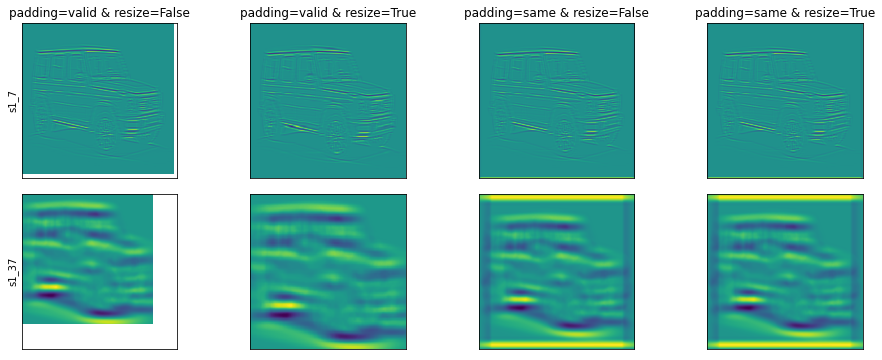

In [33]:
trainable_filters = False
paddings = ['valid', 'same']
gabors = ['s1_7', 's1_37']
resize_flags = [False, True]

fig, axs = plt.subplots(nrows=len(gabors), ncols=len(paddings)*len(resize_flags), gridspec_kw = {'wspace':0.1, 'hspace':0.1}, figsize=(16, 6), sharex=True, sharey=True)

#fig.subplots_adjust(left=0,
#                    bottom=0, 
#                    right=0, 
#                    top=0, 
#                    wspace=0, 
#                    hspace=0.00)
#\,
row = 0
col = 0
for padding in paddings:
    for resize_flag in resize_flags:        
        if row == 0:
            axs[row, col].set_title('padding='+padding+' & '+'resize='+str(resize_flag))  
        for gabor in gabors:
            if col == 0:
                axs[row, col].set_ylabel(gabor)            
            s1 = nn.Conv2d(3, n_ori, int(gabor.split('_')[-1]),padding=padding)
            s1.weight = nn.Parameter(getattr(model,gabor).weight.data.clone(), requires_grad=trainable_filters)
            output = s1(img)
            
            if resize_flag:
                output = nn.functional.interpolate(output, img.shape[2:4])
            
            axs[row, col].imshow(output.detach().numpy().squeeze()[0])
            axs[row, col].get_yaxis().set_ticks([])
            axs[row, col].get_xaxis().set_ticks([])     
            row += 1      
        row = 0
        col += 1

In [5]:
model.s1.register_forward_hook(get_activation('s1'))
model.c1.register_forward_hook(get_activation('c1'))

In [12]:
import glob
import os, cv2
parent = '/cifs/data/tserre_lrs/projects/prj_hmax/data/mnist_scale/'
images = []
for s in range(2,36,2):
    f = f'scale{s}/train/3/'
    folder  = os.path.join(parent,f)
    ims = glob.glob(os.path.join(folder,'*.jpg'))
    images.append(cv2.imread(ims[0]))

In [7]:
len(images)

17

In [19]:


# Make images to compare
#images = [make_gabor_image(ori=0, scale=13, shift_h=0, shift_v=0),
#          make_gabor_image(ori=0, scale=15, shift_h=0, shift_v=0)]
images = np.stack(images, axis=0)
images = torch.tensor(np.transpose(images,(0,3,1,2)))
images = images.float()
print(images.shape)

# Get their activations
#output = model(images)

# What to plot 
ori = 1
layer = 's1'



torch.Size([17, 3, 256, 256])


In [14]:
layer = 'c1'

In [15]:
activation.keys()

dict_keys(['s1', 'c1'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

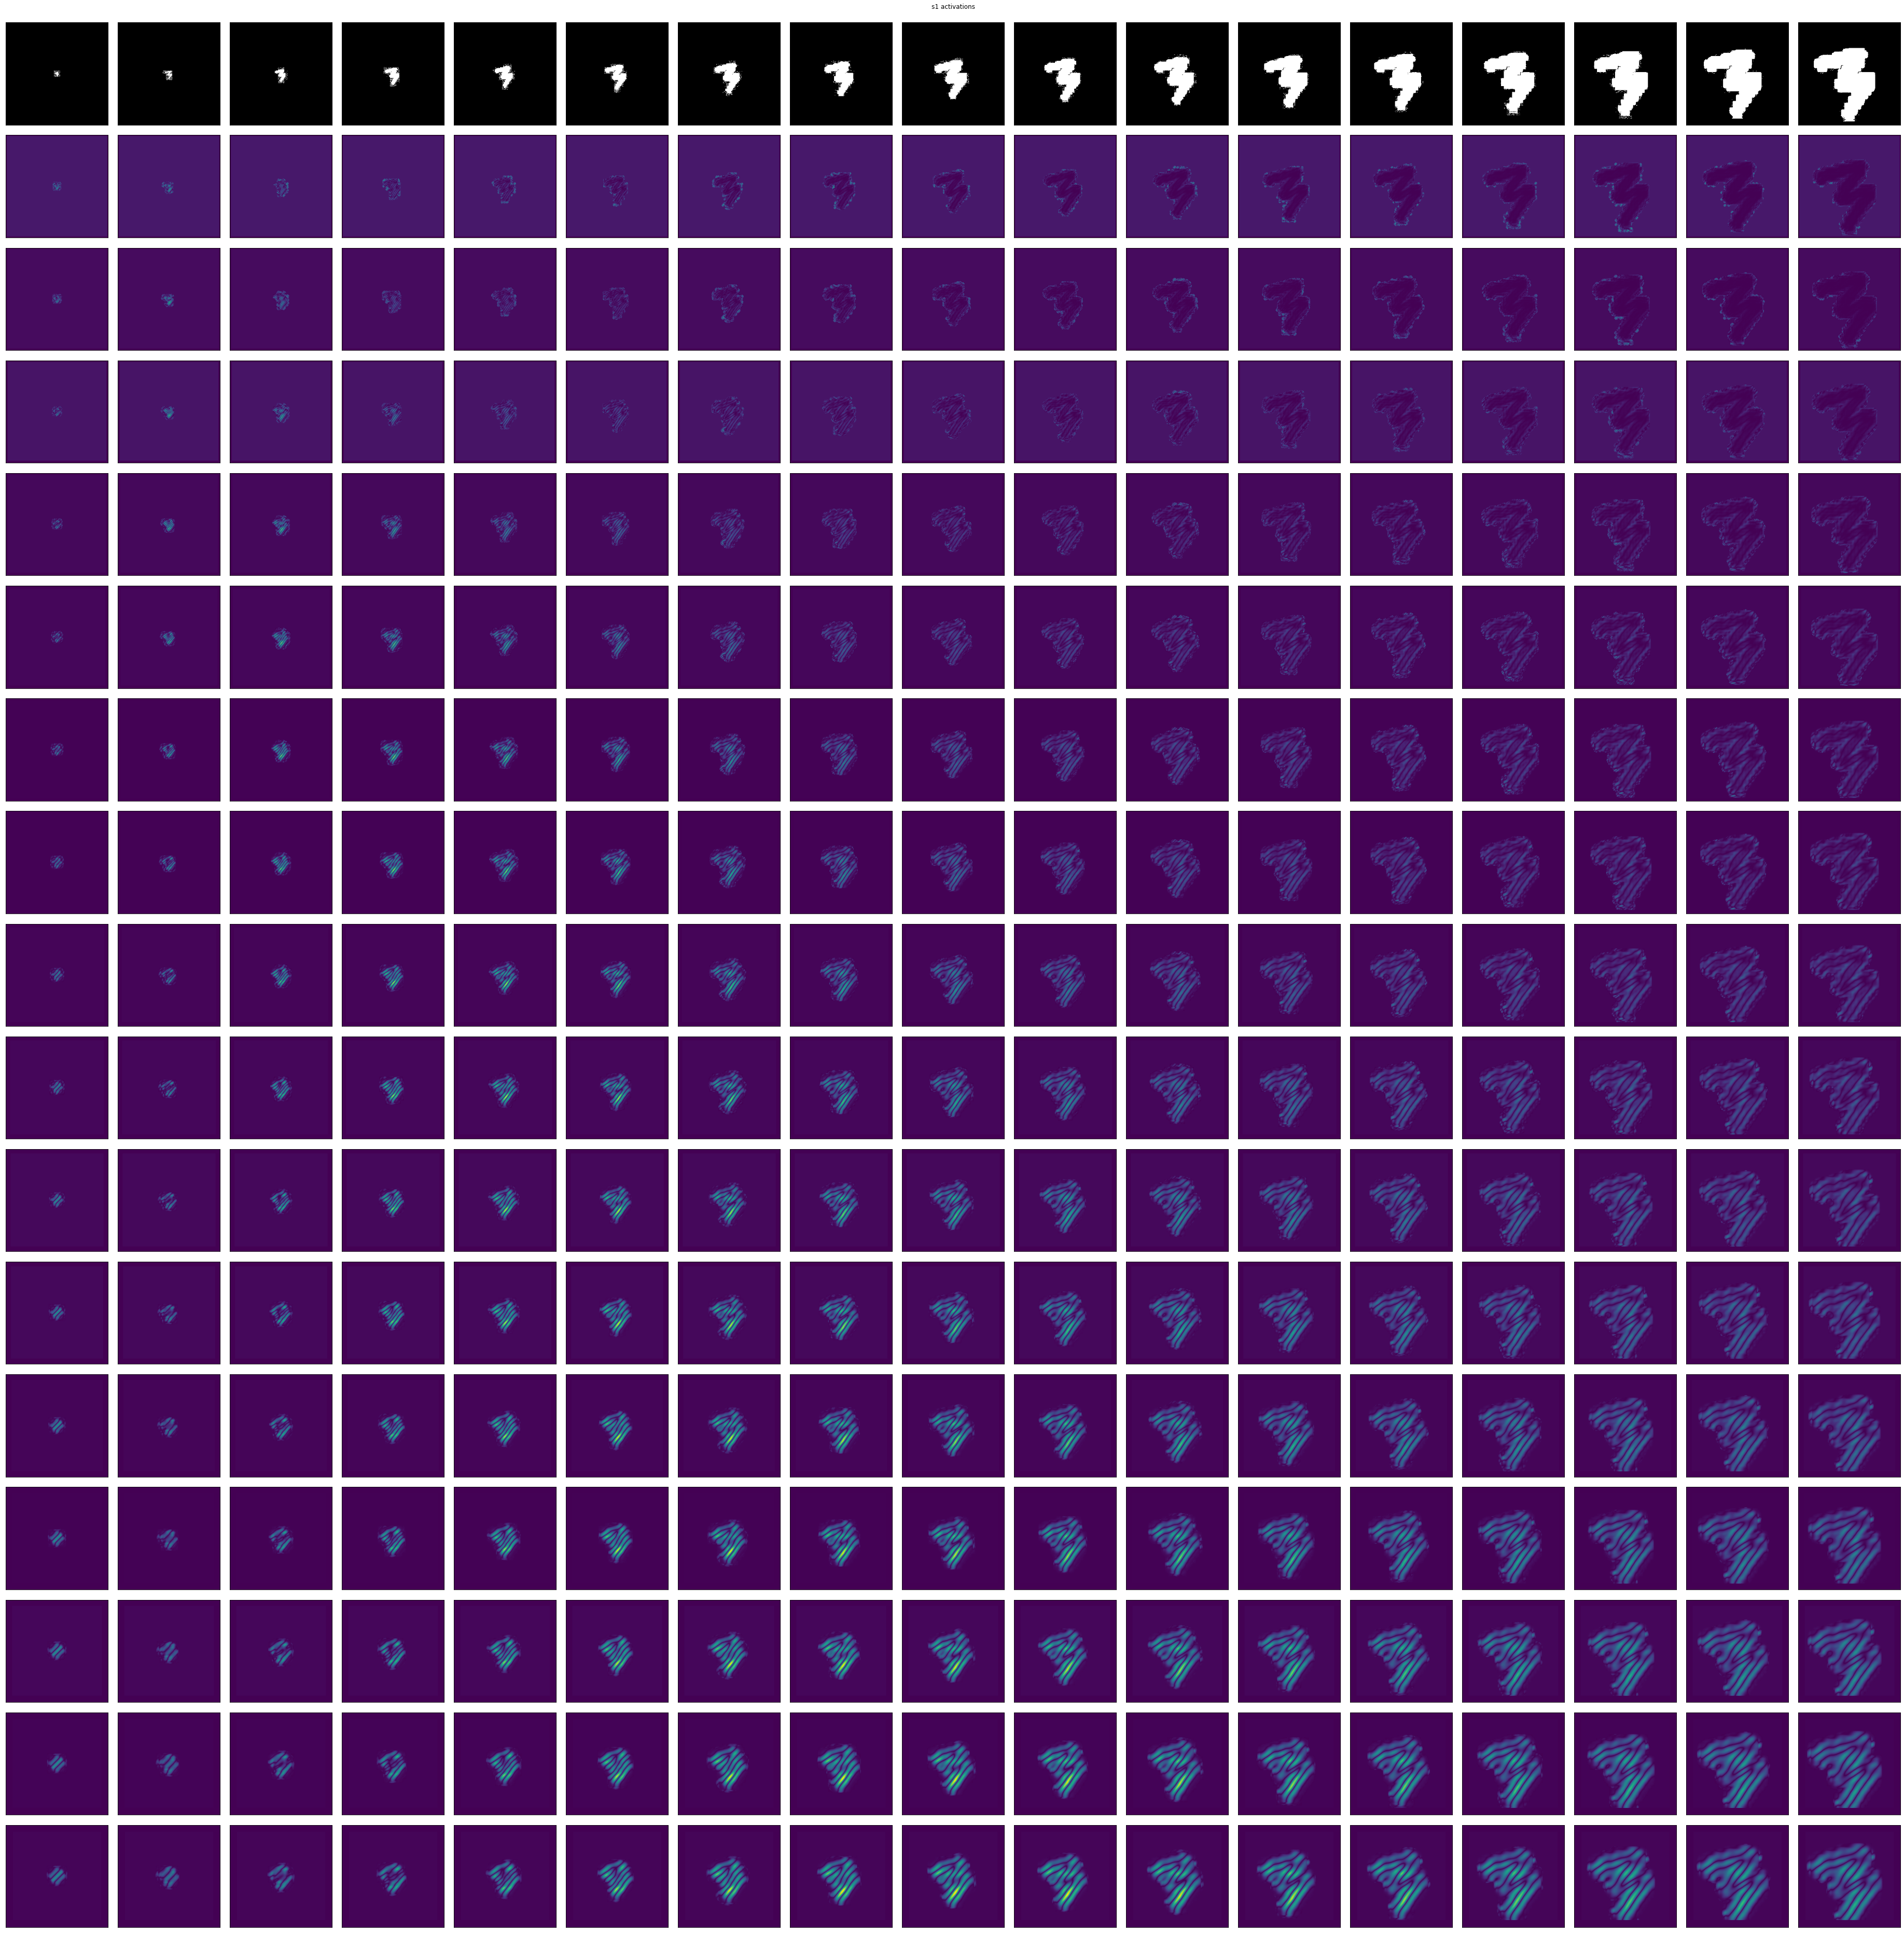

In [22]:
show_diff_col = False
# Setting up plot
fmaps = activation[layer][:,ori, :, :, :]
nrows = fmaps.shape[3] + 1
ncols = fmaps.shape[0] 

if show_diff_col:
    assert (fmaps.shape[0] == 17)
    ncols += 1
    diff_maps = fmaps[0, :, :, :] - fmaps[1, :, :, :]

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, gridspec_kw = {'wspace':0.001, 'hspace':0.1}, figsize=(ncols*3, nrows*3), sharex=True, sharey=True)

fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

# Show input images
if not show_diff_col:
    for c in range(ncols):
        axs[0, c].imshow(images.numpy().transpose(0,2,3,1)[c])
else:
    axs[0, 0].imshow(images.numpy().transpose(0,2,3,1)[0])
    axs[0, 1].imshow(images.numpy().transpose(0,2,3,1)[1])

# Show feature maps (and diff maps if requested)
for r in range(1, nrows):
    if not show_diff_col:
        #print(show_diff_col)
        for c in range(ncols):
            axs[r, c].imshow(fmaps[c, :, :, r-1], vmin = fmaps.min(), vmax=fmaps.max())
    else:
        axs[r, 0].imshow(fmaps[0, :, :, r-1], vmin = fmaps.min(), vmax=fmaps.max())
        axs[r, 1].imshow(fmaps[1, :, :, r-1], vmin = fmaps.min(), vmax=fmaps.max())
        axs[r, 2].imshow(diff_maps[:, :, r-1], vmin = diff_maps.min(), vmax=diff_maps.max())

# Disable ticks
for r in range(nrows):
    for c in range(ncols):       
        axs[r, c].get_yaxis().set_ticks([])
        axs[r, c].get_xaxis().set_ticks([])

fig.suptitle(layer + ' activations', y = 1.01)
fig.patch.set_facecolor('white')

In [17]:
for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))
    
    
s1_7 = nn.Conv2d(3, n_ori, 7,padding='valid')
s1_7.weight = nn.Parameter(getattr(model,'s1_7').weight.data.clone(), requires_grad=trainable_filters)

s1_37 = nn.Conv2d(3, n_ori, 37,padding='valid' )
s1_37.weight = nn.Parameter(getattr(model,'s1_37').weight.data.clone(), requires_grad=trainable_filters)

x7 = s1_7(img)
x37 =s1_37(img)

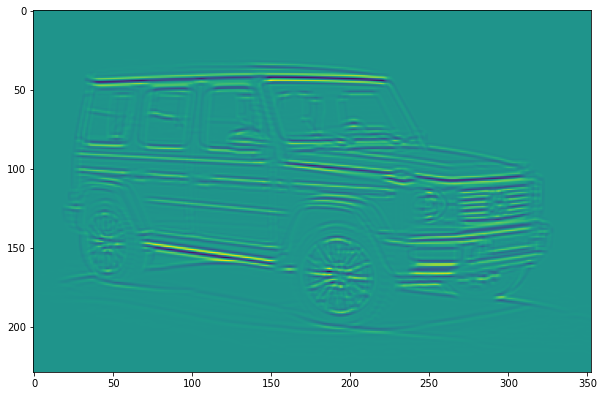

In [24]:
plt.imshow(x7.detach().numpy().squeeze()[0])

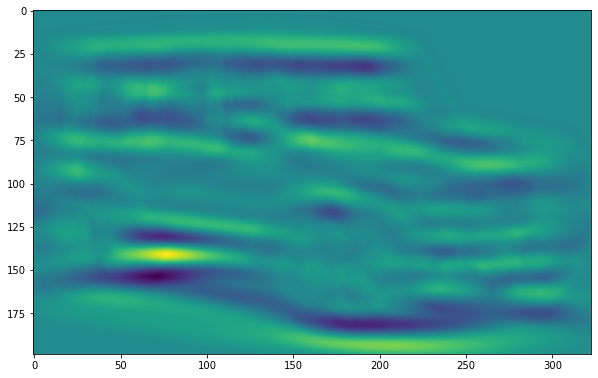

In [25]:
plt.imshow(x37.detach().numpy().squeeze()[0])

In [7]:
#def printnorm(self, input, output):
#    # input is a tuple of packed inputs
#    # output is a Tensor. output.data is the Tensor we are interested
#    print('Inside ' + self.__class__.__name__ + ' forward')
#    print('')
#    print('input: ', type(input))
#    print('input[0]: ', type(input[0]))
#    print('output: ', type(output))
#    print('')
#    print('input size:', input[0].size())
#    print('output size:', output.data.size())
#    print('output norm:', output.data.norm())
#
#model.c1.register_forward_hook(printnorm)
#
#out = model(img)

In [8]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        print(name)
        print(model.__class__.__name__ + ' forward')
        print(input[0].mean(), input[0].min(), input[0].max())
        print(output.shape)
        activation[name] = output.detach()
    return hook

In [9]:
#for i in range(7,39,2):
#        string = 's1_%d'%i
#        s_cell = getattr(model,string)
#        s_cell.register_forward_hook(get_activation(string))
model.c1.register_forward_hook(get_activation('c1'))
model.c1.register_forward_hook(get_activation('xa'))
model.c1.register_forward_hook(get_activation('xb'))
model.c1.register_forward_hook(get_activation('xc'))
model.c1.register_forward_hook(get_activation('xd'))
model.c1.register_forward_hook(get_activation('xe'))
model.c1.register_forward_hook(get_activation('xh'))

In [10]:
#for i in range(7,39,2):
#        string = 's1_%d'%i
#        s_cell = getattr(model,string)
#        s_cell.register_forward_hook(get_activation(string))
        
#for string in ['c1', 'xa', 'xb', 'xc', 'xd', 'xe', 'xh']:
#    cell = getattr(model, string)
#    cell.register_forward_hook(get_activation(string))

In [11]:
activation.keys()

dict_keys([])

In [12]:
activation.keys()

dict_keys([])

In [13]:
output = model(img)

C:\Users\lgoetsch\Anaconda3\envs\testcv\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


c1
C1 forward
tensor(3.1529, grad_fn=<MeanBackward0>) tensor(-1205.1270, grad_fn=<MinBackward1>) tensor(1245.0908, grad_fn=<MaxBackward1>)
torch.Size([1, 4, 117, 179])
xa
C1 forward
tensor(3.1529, grad_fn=<MeanBackward0>) tensor(-1205.1270, grad_fn=<MinBackward1>) tensor(1245.0908, grad_fn=<MaxBackward1>)
torch.Size([1, 4, 117, 179])
xb
C1 forward
tensor(3.1529, grad_fn=<MeanBackward0>) tensor(-1205.1270, grad_fn=<MinBackward1>) tensor(1245.0908, grad_fn=<MaxBackward1>)
torch.Size([1, 4, 117, 179])
xc
C1 forward
tensor(3.1529, grad_fn=<MeanBackward0>) tensor(-1205.1270, grad_fn=<MinBackward1>) tensor(1245.0908, grad_fn=<MaxBackward1>)
torch.Size([1, 4, 117, 179])
xd
C1 forward
tensor(3.1529, grad_fn=<MeanBackward0>) tensor(-1205.1270, grad_fn=<MinBackward1>) tensor(1245.0908, grad_fn=<MaxBackward1>)
torch.Size([1, 4, 117, 179])
xe
C1 forward
tensor(3.1529, grad_fn=<MeanBackward0>) tensor(-1205.1270, grad_fn=<MinBackward1>) tensor(1245.0908, grad_fn=<MaxBackward1>)
torch.Size([1, 4, 117

In [49]:
act1 = activation['s1_7'].squeeze()[0]
act2 = activation['s1_9'].squeeze()[0]

In [50]:
c1.position_pool

NameError: name 'c1' is not defined

In [51]:
c1 = C1()
maxact = torch.max(act1,act2)
poolact = c1.position_pool(torch.unsqueeze(maxact,0))

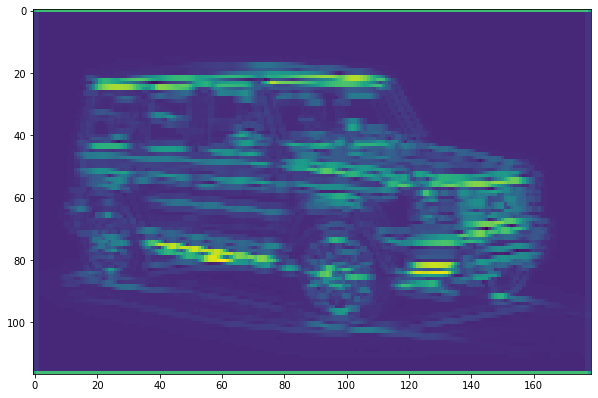

In [52]:
plt.imshow(poolact[0])

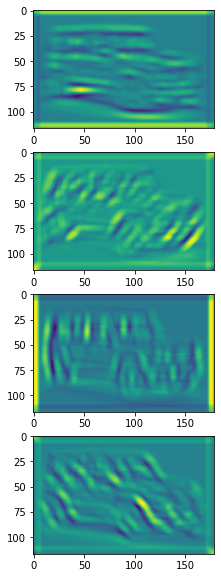

In [55]:
act = activation['xa'].squeeze()
fig, axarr = plt.subplots(act.size(0))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])

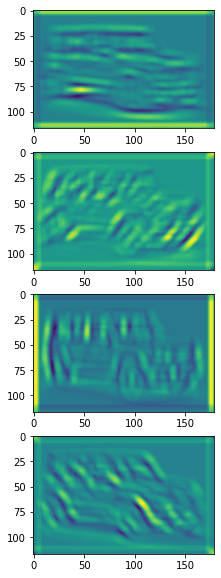

In [72]:
act = activation['xa'].squeeze()
fig, axarr = plt.subplots(act.size(0))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])

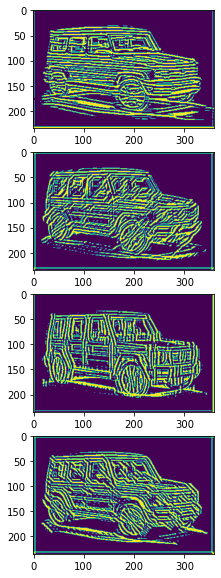

In [54]:
act = activation['s1_11'].squeeze()
fig, axarr = plt.subplots(act.size(0))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx]>10)

In [43]:
activation.keys()

dict_keys(['string', 'c1', 's1_7', 's1_9', 's1_11', 's1_13', 's1_15', 's1_17', 's1_19', 's1_21', 's1_23', 's1_25', 's1_27', 's1_29', 's1_31', 's1_33', 's1_35', 's1_37'])